In [90]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Áp dụng phân đoạn ảnh

In [91]:
def show_image(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')  

def drawHist(x):
    hist = cv2.calcHist([x], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.legend(('Histogram'), loc='upper left')

## Chọn ngưỡng: global

In [92]:
def globalThresholding(img, thres=127):
    img_rst = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img_rst[i][j] < thres:
                img_rst[i][j] = 255
            else:
                img_rst[i][j] = 0
    return img_rst

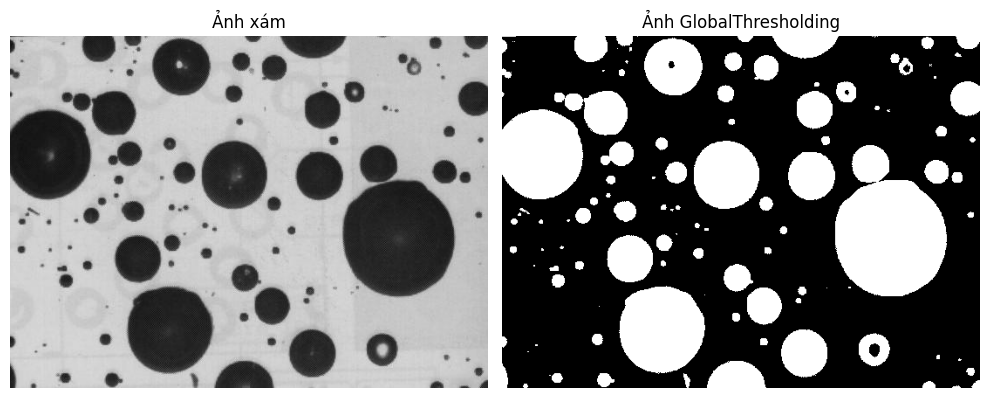

In [93]:
img_color1 = cv2.imread('images/particles.bmp')

if img_color1 is None:
    print("Lỗi: Không thể đọc ảnh. Vui lòng kiểm tra đường dẫn.")
else:
    img_gray = cv2.cvtColor(img_color1, cv2.COLOR_BGR2GRAY)

    img_binary = globalThresholding(img_gray, thres=127)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    show_image(img_gray, title='Ảnh xám')
    plt.subplot(1, 2, 2)
    show_image(img_binary, title='Ảnh GlobalThresholding')
    plt.tight_layout()
    plt.show()

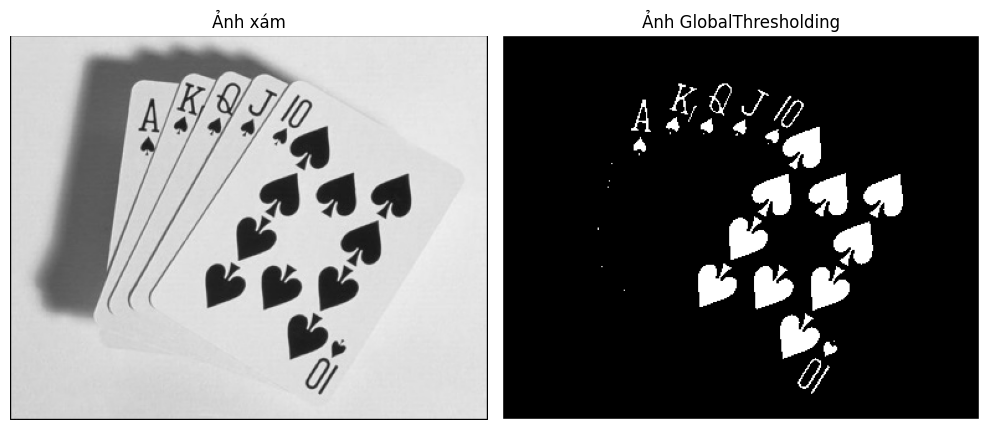

In [94]:
img_color2 = cv2.imread('images/Phandoan01.jpg')

if img_color2 is None:
    print("Lỗi: Không thể đọc ảnh. Vui lòng kiểm tra đường dẫn.")
else:
    # Chuyển đổi sang ảnh xám
    img_gray = cv2.cvtColor(img_color2, cv2.COLOR_BGR2GRAY)

    # Áp dụng hàm ngưỡng toàn cục
    img_binary = globalThresholding(img_gray, thres=85)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    show_image(img_gray, title='Ảnh xám')
    plt.subplot(1, 2, 2)
    show_image(img_binary, title='Ảnh GlobalThresholding')
    plt.tight_layout()
    plt.show()

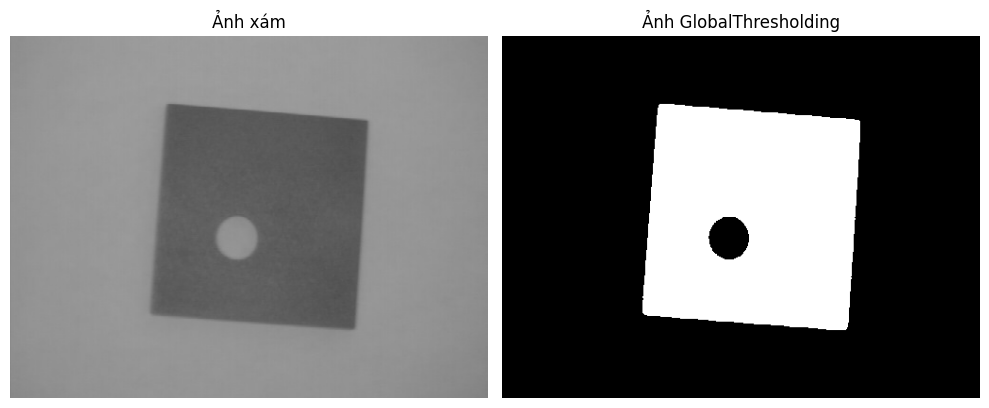

In [95]:
img_color2 = cv2.imread('images/wdg2.jpg')

if img_color2 is None:
    print("Lỗi: Không thể đọc ảnh. Vui lòng kiểm tra đường dẫn.")
else:
    # Chuyển đổi sang ảnh xám
    img_gray = cv2.cvtColor(img_color2, cv2.COLOR_BGR2GRAY)

    # Áp dụng hàm ngưỡng toàn cục
    img_binary = globalThresholding(img_gray, thres=127)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    show_image(img_gray, title='Ảnh xám')
    plt.subplot(1, 2, 2)
    show_image(img_binary, title='Ảnh GlobalThresholding')
    plt.tight_layout()
    plt.show()

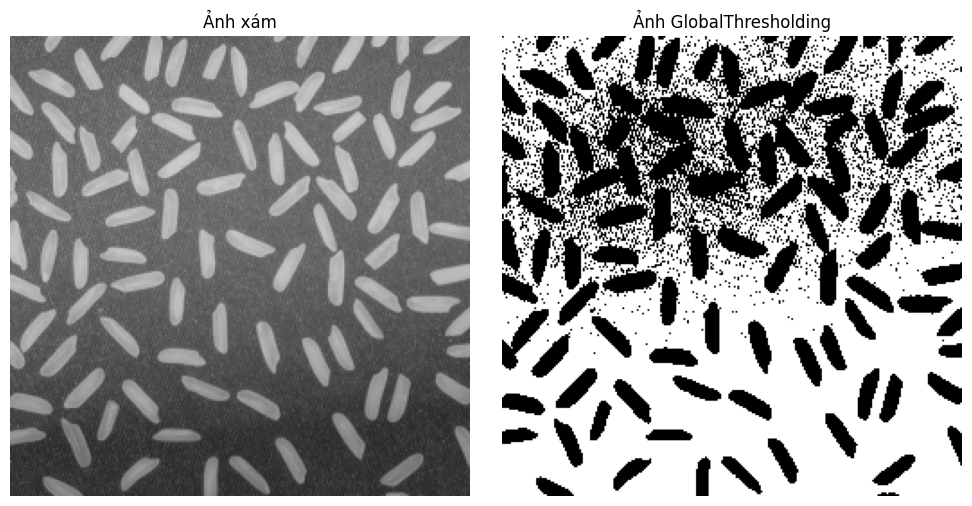

In [96]:
img_color2 = cv2.imread('images/rice.png')

if img_color2 is None:
    print("Lỗi: Không thể đọc ảnh. Vui lòng kiểm tra đường dẫn.")
else:
    # Chuyển đổi sang ảnh xám
    img_gray = cv2.cvtColor(img_color2, cv2.COLOR_BGR2GRAY)

    # Áp dụng hàm ngưỡng toàn cục
    img_binary = globalThresholding(img_gray, thres=110)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    show_image(img_gray, title='Ảnh xám')
    plt.subplot(1, 2, 2)
    show_image(img_binary, title='Ảnh GlobalThresholding')
    plt.tight_layout()
    plt.show()

## Chọn ngưỡng: Adaptive

In [97]:
def adaptiveThresholding(f, nrow, ncol):
    g = f.copy() 
    r = int(f.shape[0] / nrow) 
    c = int(f.shape[1] / ncol) 
    for i in range(nrow):
        for j in range(ncol):
            x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
            show_image(x, title=f'Block {i}-{j}') 
            drawHist(x)
            t = int(input(f'Enter threshold for block {i}-{j}: '))
            g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
    
    return g

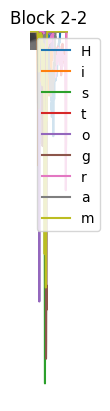

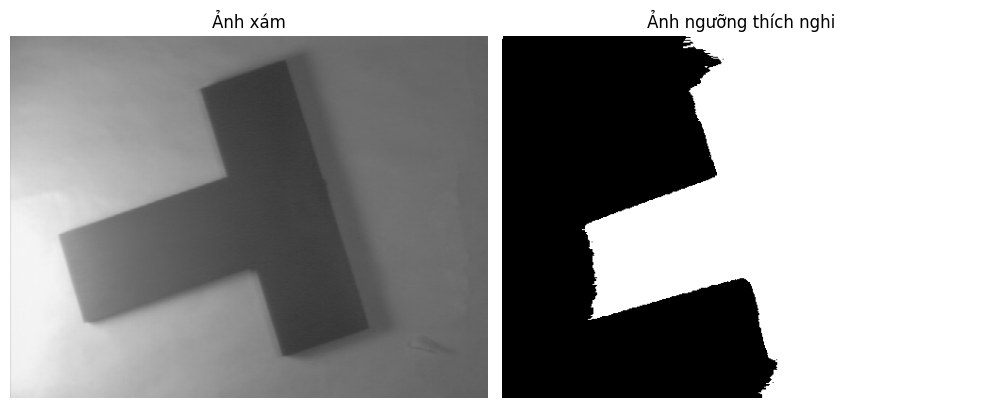

In [98]:
image_file = 'images/wdg3.jpg'

# Đọc ảnh màu
img_color = cv2.imread(image_file)

# Kiểm tra xem ảnh có được đọc thành công hay không
if img_color is None:
    print(f"Lỗi: Không thể đọc ảnh {image_file}. Vui lòng kiểm tra đường dẫn.")
else:
    # Chuyển đổi sang ảnh xám
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Áp dụng ngưỡng thích nghi
    nrow, ncol = 3, 3  # Số hàng và cột của các khối
    img_result = adaptiveThresholding(img_gray, nrow, ncol)

    # Hiển thị kết quả
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    show_image(img_gray, title='Ảnh xám')
    
    plt.subplot(1, 2, 2)
    show_image(img_result, title='Ảnh ngưỡng thích nghi')
    
    plt.tight_layout()
    plt.show()

## Áp dụng thuật toán K-means, Representing each pixel as (r,g,b)

In [99]:
def Kmeans(img, n_clusters=6):
    nrow, ncol,nchl = img.shape
    g = img.reshape(nrow*ncol,nchl)
    k_means = KMeans(n_clusters = n_clusters, random_state = 0).fit(g)
    t = k_means.cluster_centers_[k_means.labels_]
    img_res=t.reshape(nrow,ncol,nchl)
    return img_res

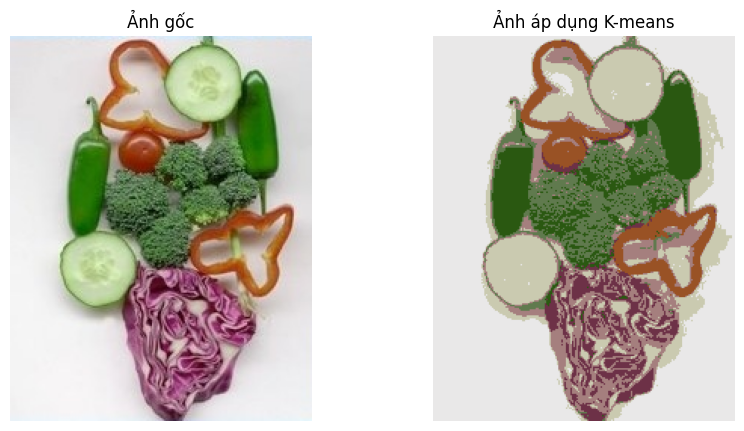

In [100]:
img = cv2.imread('images/vegetables.jpg')
img_res = Kmeans(img, n_clusters = 7)
img_res = np.clip(img_res, 0, 255).astype(np.uint8)  

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ảnh áp dụng K-means')
plt.imshow(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))  
plt.axis('off')

plt.show()

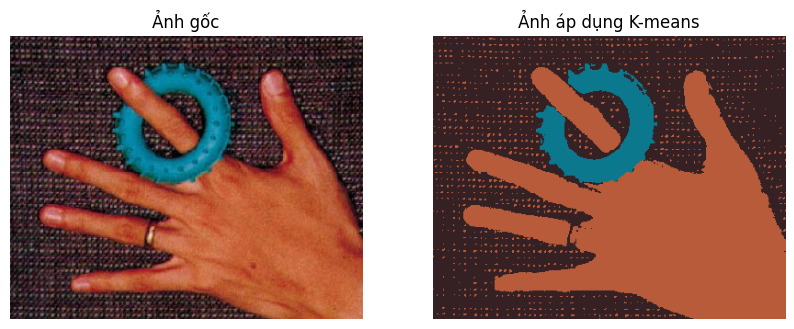

In [101]:
img = cv2.imread('images/hand.jpg')
img_res = Kmeans(img, n_clusters = 3)
img_res = np.clip(img_res, 0, 255).astype(np.uint8)  

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ảnh áp dụng K-means')
plt.imshow(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))  
plt.axis('off')

plt.show()

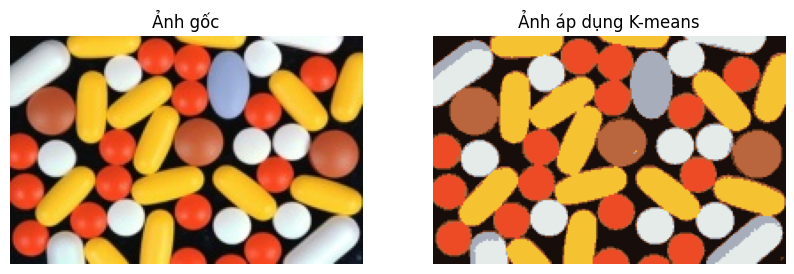

In [102]:
img = cv2.imread('images/thuoc.jpg')
img_res = Kmeans(img, n_clusters = 7)
img_res = np.clip(img_res, 0, 255).astype(np.uint8)  

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ảnh áp dụng K-means')
plt.imshow(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))  
plt.axis('off')

plt.show()

## Áp dụng thuật toán K-means, Represent each pixel as (r,g,b,x,y)


In [103]:
def Kmeans2(img, n_clusters=6):
    img_tmp = img.copy() 
    nrow, ncol, nchl = img.shape  

    g = [] 
    for y in range(nrow):
        for x in range(ncol):
            tmp = [img_tmp[y, x][0], img_tmp[y, x][1], img_tmp[y, x][2], x, y]
            g.append(tmp) 
    k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
    arrcolor = np.random.rand(20, 3) * 255
    t = arrcolor[k_means.labels_] 
    img_res = img_tmp
    i = 0 
    for y in range(nrow):
        for x in range(ncol):
            img_res[y, x] = t[i][0:3]
            i += 1
    return img_res

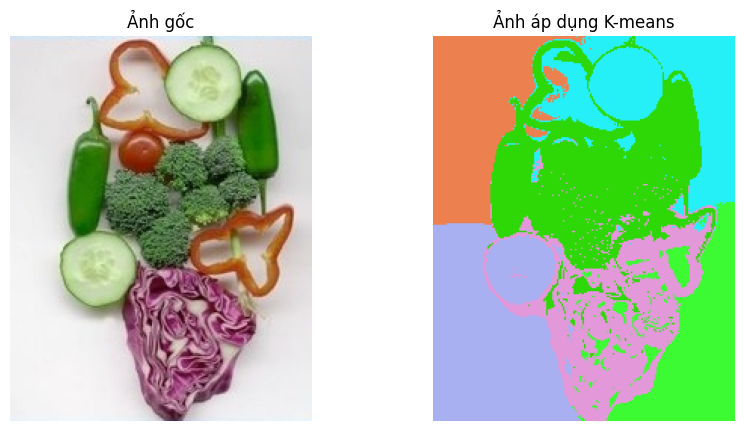

In [152]:
img = cv2.imread('images/vegetables.jpg')
img_res = Kmeans2(img, n_clusters = 6)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ảnh áp dụng K-means')
plt.imshow(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))  
plt.axis('off')

plt.show()

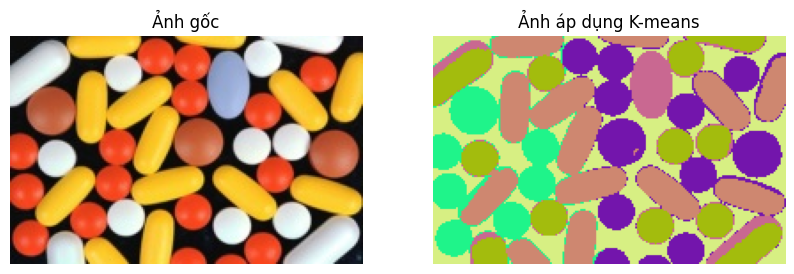

In [137]:
img = cv2.imread('images/thuoc.jpg')
img_res = Kmeans2(img, n_clusters = 6)
# Hiển thị ảnh gốc và ảnh đã xử lý
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ảnh áp dụng K-means')
plt.imshow(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))  
plt.axis('off')

plt.show()